### Human Activity
- learning method: supervised learning, classification
- learning algorithm: undetermind
- DataSets
    - feature: '../data/UCI HAR Dataset/features.txt
    - label: '../data/UCI HAR Dataset/activity_labels.txt
    - train: '../data/UCI HAR Dataset/train/X_train.txt/y_train.txt
    - test: '../data/UCI HAR Dataset/test/X_test.txt/y_test.txt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# feature file 불러오기
feature_name_df = pd.read_csv('../data/UCI HAR Dataset/features.txt', sep='\s+',
                              header=None, names=['column_index', 'column_name'])

feature_name = feature_name_df.iloc[:, 1].to_list()
print(f'전체 feature name에서 10개만 추출:\n{feature_name[:10]}')

전체 feature name에서 10개만 추출:
['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [9]:
# 중복된 feature name이 있는지 확인
feature_dup_df = feature_name_df.groupby('column_name').count()

print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [13]:
# 중복된 feature name에 _1 또는 _2 처리
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis=1)
    
    return new_feature_name_df

In [21]:
new_feature_name_df = get_new_feature_name_df(feature_name_df)
new_feature_name_df['column_name'].unique()

array(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z',
       'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y',
       'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y',
       'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1',
       'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3',
       'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3',
       'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y',
       'tBodyAcc-correlation()-

In [22]:
feature_name = new_feature_name_df.loc[:, 'column_name'].values.tolist()
feature_name[60:70]

['tGravityAcc-iqr()-Y',
 'tGravityAcc-iqr()-Z',
 'tGravityAcc-entropy()-X',
 'tGravityAcc-entropy()-Y',
 'tGravityAcc-entropy()-Z',
 'tGravityAcc-arCoeff()-X,1',
 'tGravityAcc-arCoeff()-X,2',
 'tGravityAcc-arCoeff()-X,3',
 'tGravityAcc-arCoeff()-X,4',
 'tGravityAcc-arCoeff()-Y,1']

In [24]:
# train & test load
X_train = pd.read_csv('../data/UCI HAR Dataset/train/X_train.txt', sep='\s+', names=feature_name)
X_test = pd.read_csv('../data/UCI HAR Dataset/test/X_test.txt', sep='\s+', names=feature_name)

y_train = pd.read_csv('../data/UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None, names=['action'])
y_test = pd.read_csv('../data/UCI HAR Dataset/test/y_test.txt', sep='\s+', header=None, names=['action'])

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [26]:
y_train['action'].value_counts()

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

In [28]:
print(f"X train: {X_train.shape}, {X_train.ndim}D")
print(f"y train: {y_train.shape}, {y_train.ndim}D\n")
print(f"X test: {X_test.shape}, {X_test.ndim}D")
print(f"y test: {y_test.shape}, {y_test.ndim}D\n")
print(f"train & test ratio: {len(X_train)/(len(X_train)+len(X_test))*100:.2f} %, {len(X_test)/(len(X_train)+len(X_test))*100:.2f} %")

X train: (7352, 561), 2D
y train: (7352, 1), 2D

X test: (2947, 561), 2D
y test: (2947, 1), 2D

train & test ratio: 71.39 %, 28.61 %


- learning algorithm: DecisionTree

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
# random_state = 26
# model instance
# hyperparameter: default

dct_model = DecisionTreeClassifier(random_state=26)
dct_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=26)

In [32]:
dct_model.classes_, dct_model.n_classes_

(array([1, 2, 3, 4, 5, 6], dtype=int64), 6)

In [34]:
pred = dct_model.predict(X_test)

dct_train_score = dct_model.score(X_train, y_train)
dct_test_score = dct_model.score(X_test, y_test)
dct_acc = accuracy_score(y_test, pred)
dct_mat = confusion_matrix(y_test, pred)
dct_report = classification_report(y_test, pred)

In [43]:
print(f"decision tree params:\n{dct_model.get_params()}")
print(f"decision tree train score: {dct_train_score*100:.2f} %")
print(f"decision tree test score: {dct_test_score*100:.2f} %\n")
print(f"decision tree matrix:\n{dct_mat}\n")
print(f"decision tree accuracy: {dct_acc*100:.2f} %")
print(f"decision tree classification report:\n{dct_report}")

decision tree params:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 26, 'splitter': 'best'}
decision tree train score: 100.00 %
decision tree test score: 85.37 %

decision tree matrix:
[[438  36  22   0   0   0]
 [ 69 363  39   0   0   0]
 [ 17  55 348   0   0   0]
 [  0   0   0 377 114   0]
 [  0   0   0  79 453   0]
 [  0   0   0   0   0 537]]

decision tree accuracy: 85.37 %
decision tree classification report:
              precision    recall  f1-score   support

           1       0.84      0.88      0.86       496
           2       0.80      0.77      0.78       471
           3       0.85      0.83      0.84       420
           4       0.83      0.77      0.80       491
           5       0.80      0.85      0.82       532
           6       1.00      1.00      1.00       

- 주요 featrure 라도 볼까?

In [50]:
import seaborn as sns

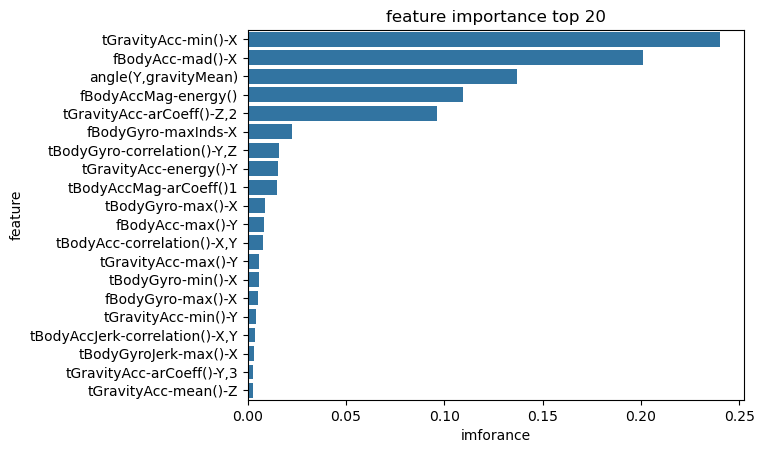

In [60]:
sns.barplot(x=pd.Series(dct_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:20], y=pd.Series(dct_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:20].index)
plt.title("feature importance top 20")
plt.xlabel("imforance")
plt.ylabel("feature")
plt.show()

- over-fitting 발생한 김에 그림이라도 그려보자

In [37]:
import graphviz
from sklearn.tree import export_graphviz

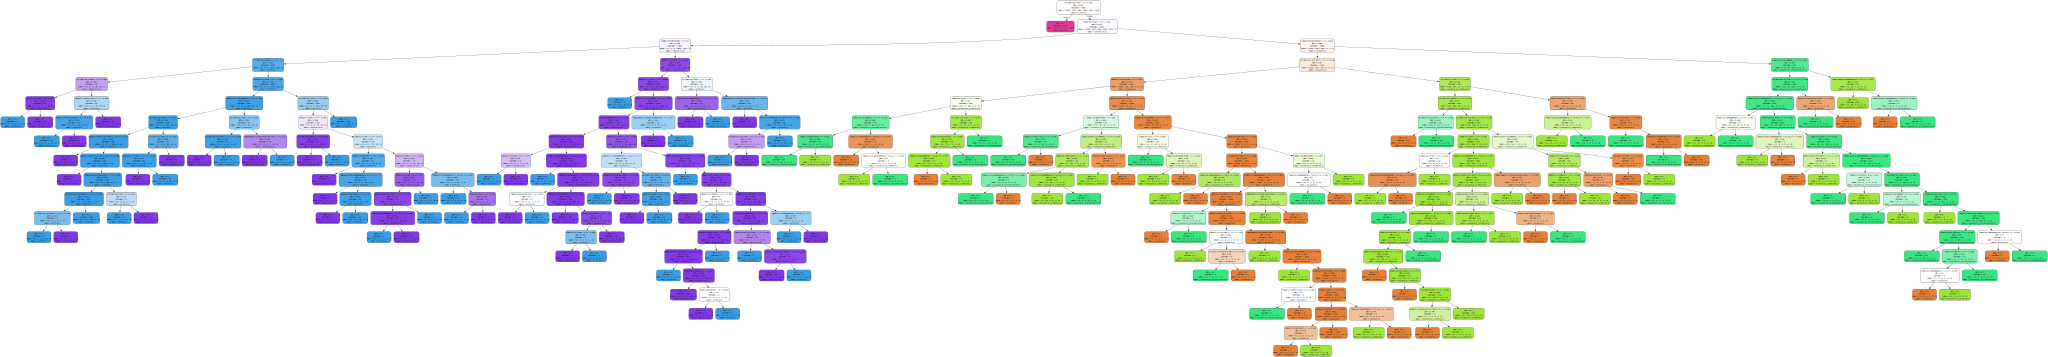

In [41]:
export_graphviz(dct_model, out_file='./hunma_activity.dot', class_names=['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING'],
                feature_names=dct_model.feature_names_in_, impurity=True, filled=True, rounded=True)

with open('./hunma_activity.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

- 실화인가?
- optimization 거의 필수...

In [44]:
from sklearn.model_selection import GridSearchCV

In [66]:
# normal에서 depth가 17까지 내려갔었음.
# 허허
params = {'max_depth':[x for x in range(4, 21, 4)], 'min_samples_leaf':[x for x in range(4, 21, 4)],
          'min_samples_split':[x for x in range(4, 21, 4)], 'splitter':['best', 'random']}
# 일단은 이정도만 해볼까?

In [67]:
# 위와 동일하게 DecisionTreeClassifier's random_state: 26
# cv: 10
grid_cv = GridSearchCV(DecisionTreeClassifier(random_state=26, criterion='gini'), param_grid=params,
                       return_train_score=True, cv=10, verbose=2, refit=True)
grid_cv.fit(X_train, y_train)

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   2.7s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   2.6s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   2.6s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   2.6s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   2.6s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   2.6s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   2.6s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   2.6s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   2.6s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=4,

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=26),
             param_grid={'max_depth': [4, 8, 12, 16, 20],
                         'min_samples_leaf': [4, 8, 12, 16, 20],
                         'min_samples_split': [4, 8, 12, 16, 20],
                         'splitter': ['best', 'random']},
             return_train_score=True, verbose=2)

In [68]:
best_model = grid_cv.best_estimator_
best_params = grid_cv.best_params_

print(f"best decision tree model: {best_model}")
print(f"best decision tree params: {best_params}")

best decision tree model: DecisionTreeClassifier(max_depth=16, min_samples_leaf=8, min_samples_split=20,
                       random_state=26)
best decision tree params: {'max_depth': 16, 'min_samples_leaf': 8, 'min_samples_split': 20, 'splitter': 'best'}


In [69]:
grid_result = grid_cv.cv_results_
grid_result_df = pd.DataFrame(grid_result)
grid_result_df.loc[:15, ['mean_train_score', 'mean_test_score', 'rank_test_score']]


,mean_train_score,mean_test_score,rank_test_score
0,0.898486,0.859632,151
1,0.887846,0.856912,182
2,0.898486,0.859632,151
3,0.887846,0.856912,182
4,0.898486,0.859632,151
5,0.887846,0.856912,182
6,0.898486,0.859632,151
7,0.888511,0.850517,226
8,0.898486,0.859632,151
9,0.888511,0.850517,226


In [70]:
best_pred = best_model.predict(X_test)

best_train_score = best_model.score(X_train, y_train)
best_test_score = best_model.score(X_test, y_test)

best_acc = accuracy_score(y_test, best_pred)
best_mat = confusion_matrix(y_test, best_pred)
best_report = classification_report(y_test, best_pred)

In [71]:
print(f"best decision tree params:\n{best_params}")
print(f"best decision tree train score: {best_train_score*100:.2f} %")
print(f"bsest decision tree test score: {best_test_score*100:.2f} %\n")
print(f"best decision tree matrix:\n{best_mat}\n")
print(f"best decision tree accuracy: {best_acc*100:.2f} %")
print(f"best decision tree classification report:\n{best_report}")

best decision tree params:
{'max_depth': 16, 'min_samples_leaf': 8, 'min_samples_split': 20, 'splitter': 'best'}
best decision tree train score: 97.70 %
bsest decision tree test score: 87.14 %

best decision tree matrix:
[[474  10  12   0   0   0]
 [ 74 362  35   0   0   0]
 [ 18  54 348   0   0   0]
 [  0   0   0 376 115   0]
 [  0   0   0  61 471   0]
 [  0   0   0   0   0 537]]

best decision tree accuracy: 87.14 %
best decision tree classification report:
              precision    recall  f1-score   support

           1       0.84      0.96      0.89       496
           2       0.85      0.77      0.81       471
           3       0.88      0.83      0.85       420
           4       0.86      0.77      0.81       491
           5       0.80      0.89      0.84       532
           6       1.00      1.00      1.00       537

    accuracy                           0.87      2947
   macro avg       0.87      0.87      0.87      2947
weighted avg       0.87      0.87      0.87     

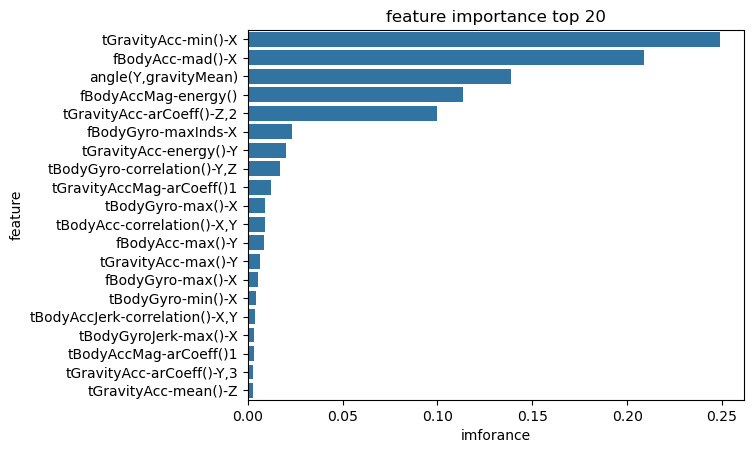

In [72]:
sns.barplot(x=pd.Series(best_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:20], y=pd.Series(best_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:20].index)
plt.title("feature importance top 20")
plt.xlabel("imforance")
plt.ylabel("feature")
plt.show()

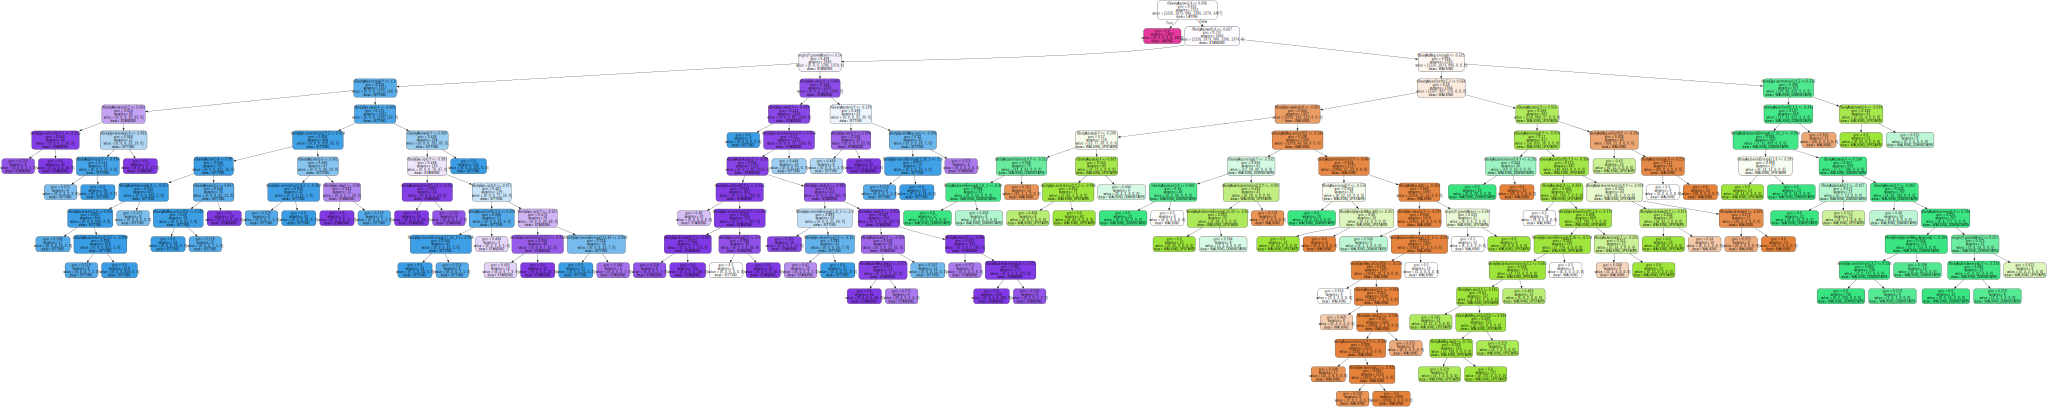

In [73]:
export_graphviz(best_model, out_file='./hunma_activity_best.dot', class_names=['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING'],
                feature_names=best_model.feature_names_in_, impurity=True, filled=True, rounded=True)

with open('./hunma_activity_best.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)